<a href="https://colab.research.google.com/github/pramod-sanghavi/Data-Science-work/blob/master/Image_to_cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
#Use bilateral filter for edge-aware smoothing.
num_down = 2 # number of downsampling steps
num_bilateral = 7 # number of bilateral filtering steps

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pramod.jpg to pramod.jpg


In [ ]:
img_rgb = cv2.imread("pramod.jpg")

In [ ]:
# downsample image using Gaussian pyramid
img_color = img_rgb.copy()
for _ in range(num_down):
   img_color = cv2.pyrDown(img_color)

# repeatedly apply small bilateral filter instead of
# applying one large filter
for _ in range(num_bilateral):
  img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)

# upsample image to original size
for _ in range(num_down):
   img_color = cv2.pyrUp(img_color)

In [ ]:
#Use median filter to reduce noise
# convert to grayscale and apply median blur
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

In [ ]:
#Use adaptive thresholding to create an edge mask
# detect and enhance edges
img_edge = cv2.adaptiveThreshold(img_blur, 255,
   cv2.ADAPTIVE_THRESH_MEAN_C,
   cv2.THRESH_BINARY,
   blockSize=9,
   C=2)

In [ ]:
# Combine color image with edge mask & display picture
# convert back to color, bit-AND with color image
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)

# display
import matplotlib.pyplot as plt
plt.imshow(img_cartoon)

error: ignored

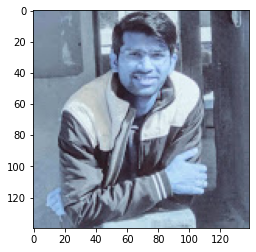

In [ ]:
# importing libraries 
import cv2 
import numpy as np 

# reading image 
img = cv2.imread("pramod.jpg") 

# Edges 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.medianBlur(gray, 5) 
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
										cv2.THRESH_BINARY, 9, 9) 

# Cartoonization 
color = cv2.bilateralFilter(img, 9, 250, 250) 
cartoon = cv2.bitwise_and(color, color, mask=edges) 


plt.imshow(img) 



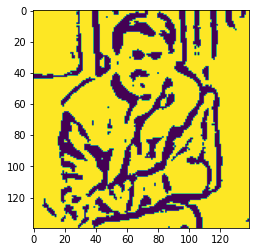

In [ ]:
plt.imshow(edges) 


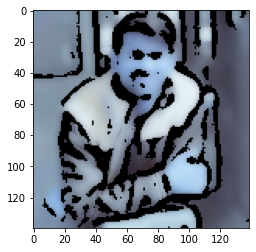

In [ ]:
plt.imshow(cartoon) 

In [ ]:
https://subscription.packtpub.com/book/application_development/9781785282690/1/ch01lvl1sec12/cartoonizing-an-image